# Fertilizer Recommandation System

In [1]:
import warnings 
warnings.filterwarnings(action="ignore")

## Import required packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Load the data

In [5]:
df=pd.read_csv('../Dataset/Fertilizer Prediction.csv')

## Exploratory data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Temparature      100000 non-null  int64 
 1   Humidity         100000 non-null  int64 
 2   Moisture         100000 non-null  int64 
 3   Soil Type        100000 non-null  object
 4   Crop Type        100000 non-null  object
 5   Nitrogen         100000 non-null  int64 
 6   Potassium        100000 non-null  int64 
 7   Phosphorous      100000 non-null  int64 
 8   Fertilizer Name  100000 non-null  object
dtypes: int64(6), object(3)
memory usage: 6.9+ MB


In [7]:
df.isna().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [8]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,32,51,41,Red,Ground Nuts,7,3,19,14-35-14
1,35,58,35,Black,Cotton,4,14,16,Urea
2,27,55,43,Sandy,Sugarcane,28,0,17,20-20
3,33,56,56,Loamy,Ground Nuts,37,5,24,28-28
4,32,70,60,Red,Ground Nuts,4,6,9,14-35-14


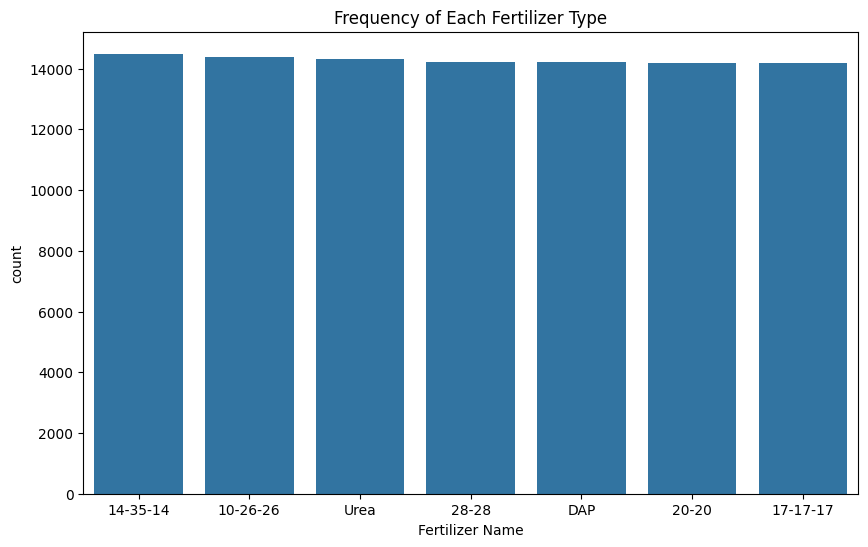

In [9]:

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Fertilizer Name', order=df['Fertilizer Name'].value_counts().index)
plt.title("Frequency of Each Fertilizer Type")
plt.show()


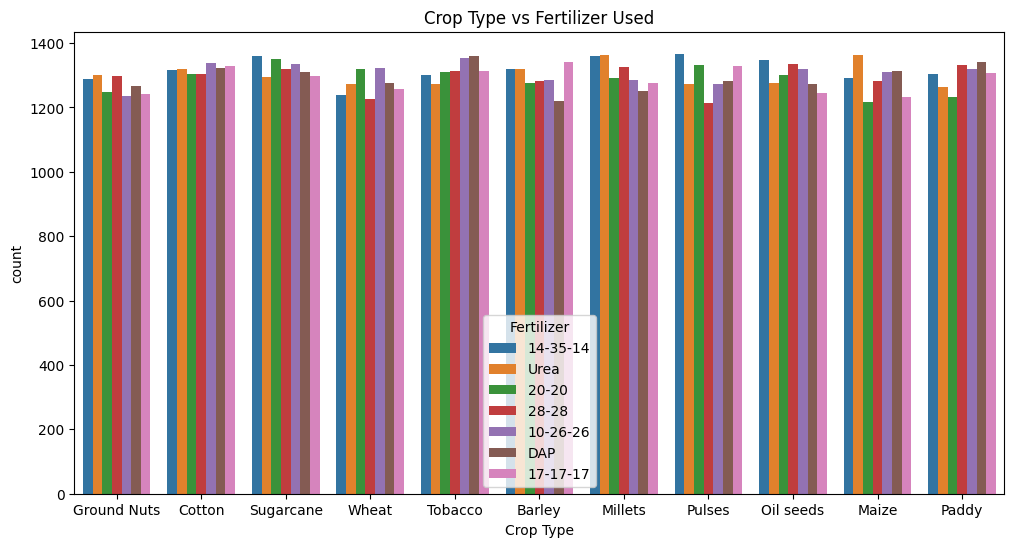

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Crop Type', hue='Fertilizer Name')
plt.title("Crop Type vs Fertilizer Used")
plt.legend(title="Fertilizer")
plt.show()


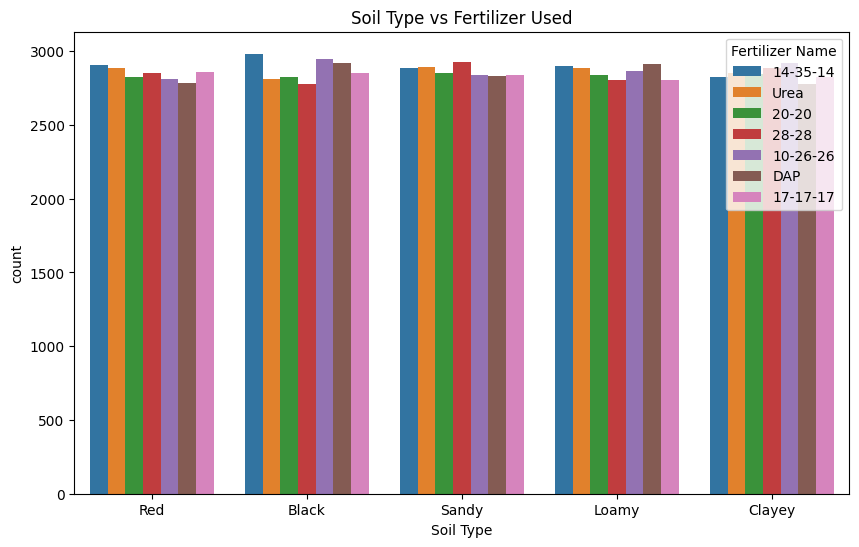

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Soil Type', hue='Fertilizer Name')
plt.title("Soil Type vs Fertilizer Used")
plt.show()


In [12]:
df['Soil Type'].unique()

array(['Red', 'Black', 'Sandy', 'Loamy', 'Clayey'], dtype=object)

In [13]:
df['Crop Type'].unique()

array(['Ground Nuts', 'Cotton', 'Sugarcane', 'Wheat', 'Tobacco', 'Barley',
       'Millets', 'Pulses', 'Oil seeds', 'Maize', 'Paddy'], dtype=object)

In [14]:
df['Fertilizer Name'].unique()

array(['14-35-14', 'Urea', '20-20', '28-28', '10-26-26', 'DAP',
       '17-17-17'], dtype=object)

## Handling Categorical values

In [15]:
from sklearn.preprocessing import LabelEncoder
le_soil=LabelEncoder()
le_crop=LabelEncoder()
le_fertilizer=LabelEncoder()

df['Soil Type']=le_soil.fit_transform(df['Soil Type'])
df['Crop Type']=le_crop.fit_transform(df['Crop Type'])
df['Fertilizer Name']=le_fertilizer.fit_transform(df['Fertilizer Name'])

In [16]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,32,51,41,3,2,7,3,19,1
1,35,58,35,0,1,4,14,16,6
2,27,55,43,4,8,28,0,17,3
3,33,56,56,2,2,37,5,24,4
4,32,70,60,3,2,4,6,9,1


In [17]:
df.corr()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
Temparature,1.000000,0.000072,-0.001138,-0.003820,-0.004625,-0.004307,-0.006487,0.001195,0.001067
Humidity,0.000072,1.000000,0.001842,0.003834,0.002411,0.002713,0.004052,0.001427,0.002912
Moisture,-0.001138,0.001842,1.000000,-0.001931,-0.002032,0.003055,0.000358,-0.005405,0.000827
Soil Type,-0.003820,0.003834,-0.001931,1.000000,-0.005089,0.000909,0.002978,-0.002690,0.006014
Crop Type,-0.004625,0.002411,-0.002032,-0.005089,1.000000,0.000288,-0.001285,-0.000334,-0.003755
Nitrogen,-0.004307,0.002713,0.003055,0.000909,0.000288,1.000000,0.000266,-0.004432,-0.003239
Potassium,-0.006487,0.004052,0.000358,0.002978,-0.001285,0.000266,1.000000,0.000718,-0.004847
Phosphorous,0.001195,0.001427,-0.005405,-0.002690,-0.000334,-0.004432,0.000718,1.000000,-0.003505
Fertilizer Name,0.001067,0.002912,0.000827,0.006014,-0.003755,-0.003239,-0.004847,-0.003505,1.000000


In [8]:
from sklearn.preprocessing import LabelEncoder
le_soil=LabelEncoder()
le_crop=LabelEncoder()
le_fertilizer=LabelEncoder()

df['Soil Type']=le_soil.fit_transform(df['Soil Type'])
df['Crop Type']=le_crop.fit_transform(df['Crop Type'])
df['Fertilizer Name']=le_fertilizer.fit_transform(df['Fertilizer Name'])

## Split the Data

In [20]:
x=df[['Temparature','Humidity','Moisture','Soil Type','Nitrogen','Potassium','Phosphorous']]
y=df['Fertilizer Name']

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=453)

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

models = {
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}
xgb_model = None 
for name, model in models.items():
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    print(f"----- {name} -----")
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds))
    print("\n")
    if name=="XGBoost":
        xgb_model=model

----- Decision Tree -----
Accuracy: 0.7692307692307693
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.60      1.00      0.75         3
           2       0.50      1.00      0.67         1
           3       1.00      0.67      0.80         6
           4       0.50      0.75      0.60         4
           5       1.00      1.00      1.00         3
           6       1.00      0.71      0.83         7

    accuracy                           0.77        26
   macro avg       0.80      0.80      0.76        26
weighted avg       0.86      0.77      0.78        26



----- XGBoost -----
Accuracy: 0.7307692307692307
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.50      1.00      0.67         3
           2       0.33      1.00      0.50         1
           3       0.80      0.6

# Save the model 

In [21]:
import pickle
with open ("fertilizer_recommendation.pkl","wb") as file:
    pickle.dump(xgb_model,file)

print("XGB model is saved successfully...")
    
    

XGB model is saved successfully...


In [22]:
fert_mapping = {int(i): name for i, name in enumerate(fertilizer_encoder.classes_)}
with open("fert_mapping.json", "w") as f:
    json.dump(fert_mapping, f)

In [23]:
soil_mapping = {int(i): name for i, name in enumerate(soil_encoder.classes_)}
with open("soil_mapping.json", "w") as f:
    json.dump(soil_mapping, f)